In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

# Correction du chemin de données pour correspondre à la structure Scripts
# Le notebook est dans Partie 3/, les données sont dans Data/ à la racine
df = pd.read_csv("../Data/Camp_Market_Cleaned.csv")

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Last_Purchase,MntWines,MntFruits,MntMeatProducts,...,Z_CostContact,Z_Revenue,Response,Customer_For_Months,Childrens,Family_Size,Total_Spent,Total_Purchases,Age,Age_group
0,5524,1957,Graduate,Single,58138,04/09/2012,58,635,88,546,...,3,11,1,159,0,1,1617,25,59,50-59
1,2174,1954,Graduate,Single,46344,08/03/2014,38,11,1,6,...,3,11,0,141,2,3,27,6,62,60-69
2,4141,1965,Graduate,Couple,71613,21/08/2013,26,426,49,127,...,3,11,0,148,0,2,776,21,51,50-59
3,6182,1984,Graduate,Couple,26646,10/02/2014,26,11,4,20,...,3,11,0,142,1,3,53,8,32,30-39
4,5324,1981,Postgrad,Couple,58293,19/01/2014,94,173,43,118,...,3,11,0,143,1,3,422,19,35,30-39


In [2]:
rfm = df[['ID', 'Last_Purchase', 'Total_Purchases', 'Total_Spent']].copy()

rfm.columns = ['ID', 'Recency', 'Frequency', 'Monetary']

rfm.describe()

,ID,Recency,Frequency,Monetary
count,2039.000000,2039.000000,2039.000000,2039.000000
mean,5591.690535,49.096616,14.858754,605.871015
std,3257.763252,28.974507,7.659822,602.092007
min,0.000000,0.000000,0.000000,5.000000
25%,2804.500000,24.000000,8.000000,68.500000
50%,5510.000000,49.000000,15.000000,396.000000
75%,8434.500000,74.000000,21.000000,1044.500000
max,11191.000000,99.000000,44.000000,2525.000000


In [3]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

rfm_scaled = pd.DataFrame(rfm_scaled, columns=['Recency', 'Frequency', 'Monetary'])

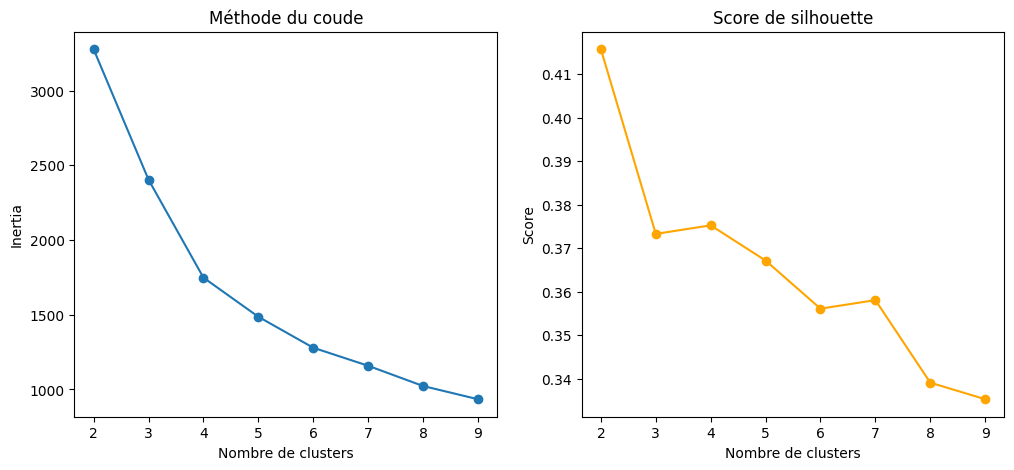

In [16]:
inertia = []
silhouette = []
K = range(2, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(rfm_scaled, kmeans.labels_))

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(K, inertia, marker='o')
plt.title('Méthode du coude')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertia')

plt.subplot(1,2,2)
plt.plot(K, silhouette, marker='o', color='orange')
plt.title('Score de silhouette')
plt.xlabel('Nombre de clusters')
plt.ylabel('Score')

plt.show()

In [12]:
k = 2

kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(rfm_scaled)

,Total_Spent,Total_Purchases,Last_Purchase,Income,Age
Cluster,,,,,
0,1138.85,21.67,49.27,68611.46,49.23
1,134.46,8.84,48.95,37951.16,45.47


C:\Users\aymer\AppData\Local\Temp\ipykernel_20584\854870749.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Total_Spent', data=df, palette='Set2')


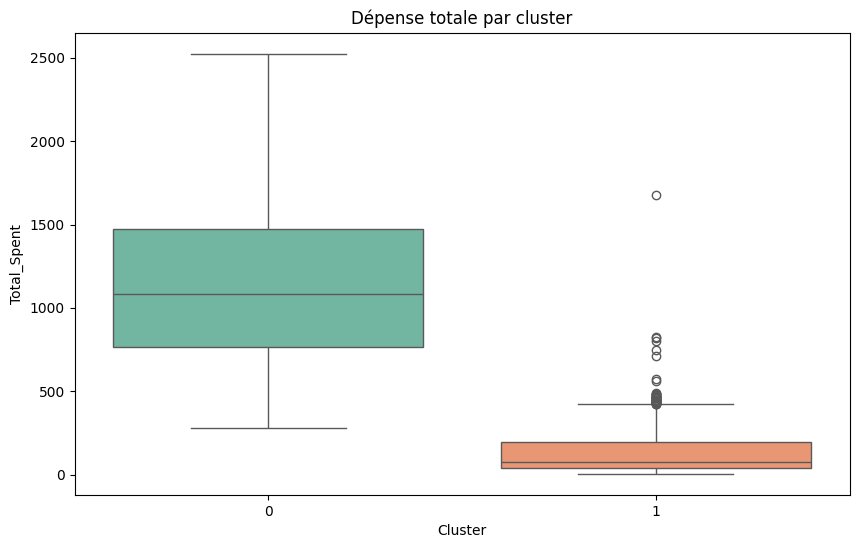

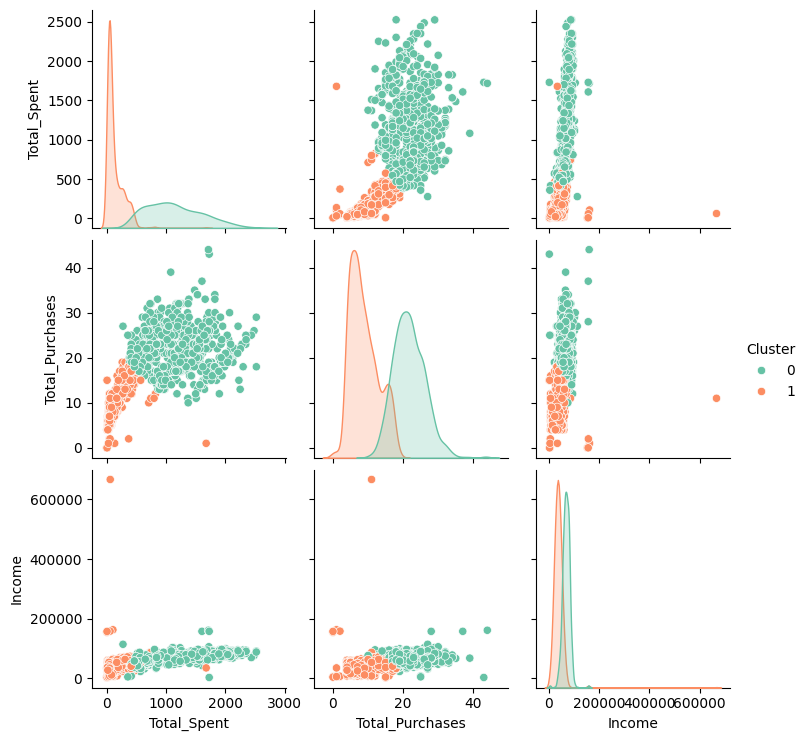

In [13]:
cluster_summary = df.groupby('Cluster')[['Total_Spent', 'Total_Purchases', 'Last_Purchase', 'Income', 'Age']].mean().round(2)
display(cluster_summary)

plt.figure(figsize=(10,6))
sns.boxplot(x='Cluster', y='Total_Spent', data=df, palette='Set2')
plt.title('Dépense totale par cluster')
plt.show()

sns.pairplot(df, vars=['Total_Spent','Total_Purchases','Income'], hue='Cluster', palette='Set2')
plt.show()

C:\Users\aymer\AppData\Local\Temp\ipykernel_20584\1093591045.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('Set2', len(df['Cluster'].unique()))


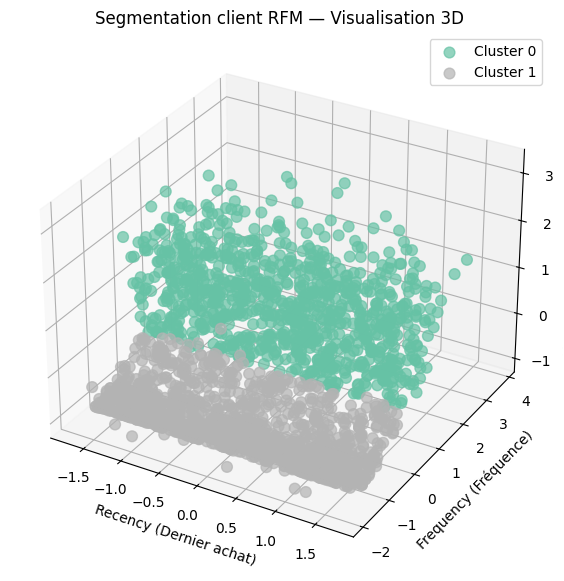

In [ ]:
rfm_scaled_3d = pd.DataFrame(rfm_scaled, columns=['Recency', 'Frequency', 'Monetary'])
rfm_scaled_3d['Cluster'] = df['Cluster']

colors = cm.get_cmap('Set2', len(df['Cluster'].unique()))

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

for cluster in rfm_scaled_3d['Cluster'].unique():
    cluster_data = rfm_scaled_3d[rfm_scaled_3d['Cluster'] == cluster]
    ax.scatter(cluster_data['Recency'], cluster_data['Frequency'], cluster_data['Monetary'],
               label=f'Cluster {cluster}', s=60, alpha=0.7, color=colors(cluster))

ax.set_xlabel('Recency (Dernier achat)')
ax.set_ylabel('Frequency (Fréquence)')
ax.set_zlabel('Monetary (Montant dépensé)')
ax.set_title('Segmentation client RFM — Visualisation 3D')
ax.legend()
plt.show()

In [ ]:
segmentation = df[['ID', 'Age', 'Income', 'Total_Spent', 'Total_Purchases',
                   'Family_Size', 'Childrens', 'Cluster']]

# Sauvegarder les fichiers CSV dans les emplacements attendus à la racine
segmentation.to_csv("../customer_segmentation.csv", index=False)
print("✅ Fichier 'customer_segmentation.csv' enregistré avec succès.")

cluster_profiles = df.groupby('Cluster')[['Age', 'Income', 'Total_Spent',
                                          'Total_Purchases', 'Family_Size',
                                          'Childrens']].mean().round(2)

cluster_profiles['Nombre_Clients'] = df['Cluster'].value_counts().sort_index().values

cluster_profiles.to_csv("../cluster_profiles.csv", index=True)
print("✅ Fichier 'cluster_profiles.csv' enregistré avec succès.")

display(cluster_profiles)

✅ Fichier 'customer_segmentation.csv' enregistré avec succès.
✅ Fichier 'cluster_profiles.csv' enregistré avec succès.


,Age,Income,Total_Spent,Total_Purchases,Family_Size,Childrens,Nombre_Clients
Cluster,,,,,,,
0,49.23,68611.46,1138.85,21.67,2.28,0.65,957
1,45.47,37951.16,134.46,8.84,2.87,1.22,1082
